# 실전 데이터를 활용한 Pandas모듈 활용2 - 시각화

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#디폴트 폰트가 한글 지원x
plt.rc('font', family='Malgun Gothic') 

# - 부호가 깨질때
plt.rcParams['axes.unicode_minus'] = False

# Graph 사이즈 키우는 옵션
plt.rcParams["figure.figsize"] = (9, 6)

In [4]:
# 민간아파트 가격동향
df = pd.read_csv('data2/house_price2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     4505 non-null   object
 1   규모구분    4505 non-null   object
 2   연도      4505 non-null   int64 
 3   월       4505 non-null   int64 
 4   분양가격    4505 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 176.1+ KB


## 1. line plot
- 주가데이터 처럼 연속성이 있는 데이터들은 보기 좋은데 분양가는 그런 종류가 아니라서 라인 그래프로는 보기가 불편

<AxesSubplot:>

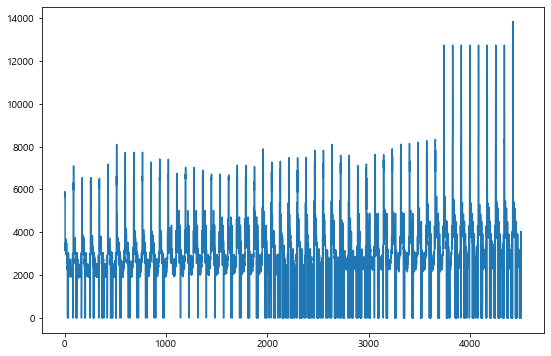

In [7]:
df['분양가격'].plot(kind='line')

In [8]:
df_seoul = df.loc[df['지역명']=='서울']
df_seoul

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879
...,...,...,...,...,...
4420,서울,전체,2020,2,7972
4421,서울,60㎡이하,2020,2,8193
4422,서울,60㎡초과 85㎡이하,2020,2,8140
4423,서울,85㎡초과 102㎡이하,2020,2,13835


In [18]:
df_seoul_year = df_seoul.groupby('연도').mean()['분양가격']
df_seoul_year

연도
2015    6156.266667
2016    6591.950000
2017    6625.483333
2018    7030.983333
2019    8571.766667
2020    9327.200000
Name: 분양가격, dtype: float64

<AxesSubplot:xlabel='연도'>

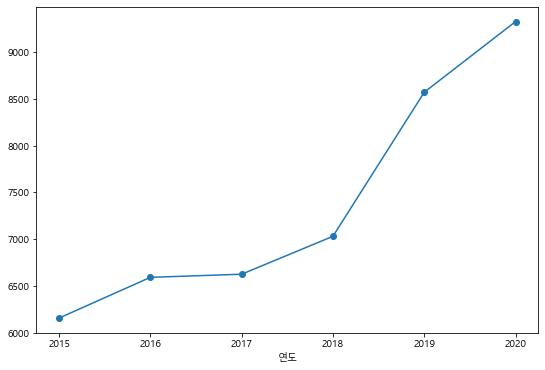

In [25]:
df_seoul_year.plot(kind='line', marker='o')

## 2. bar plot

<AxesSubplot:xlabel='지역명'>

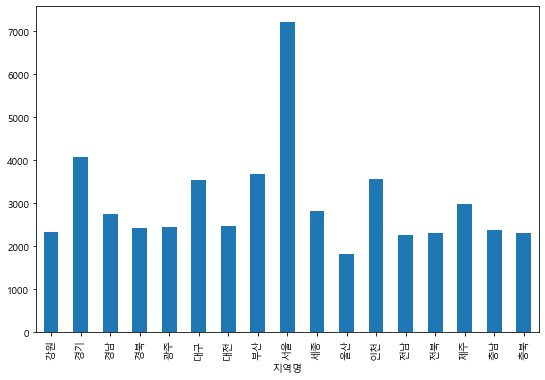

In [30]:
df.groupby('지역명')['분양가격'].mean().plot(kind='bar')

<AxesSubplot:ylabel='지역명'>

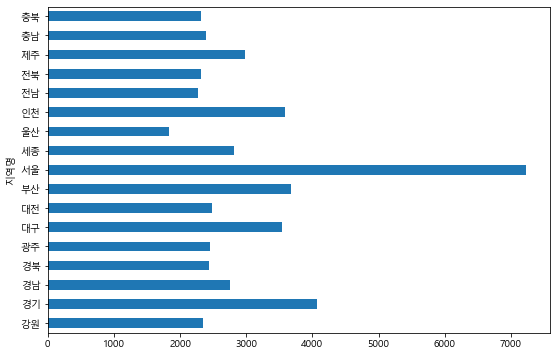

In [31]:
df.groupby('지역명')['분양가격'].mean().plot(kind='barh')

## 3. histogram
- x축 : 분포 / y축 : 빈도
- 도수분포표

In [32]:
df['분양가격']

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4500    3955
4501    4039
4502    3962
4503       0
4504    3601
Name: 분양가격, Length: 4505, dtype: int64

<AxesSubplot:ylabel='Frequency'>

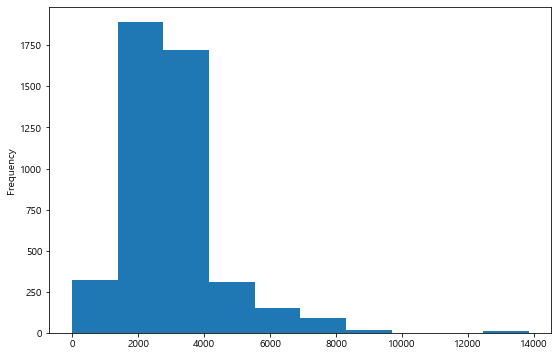

In [33]:
df['분양가격'].plot(kind='hist')

## 4. box plot

<AxesSubplot:>

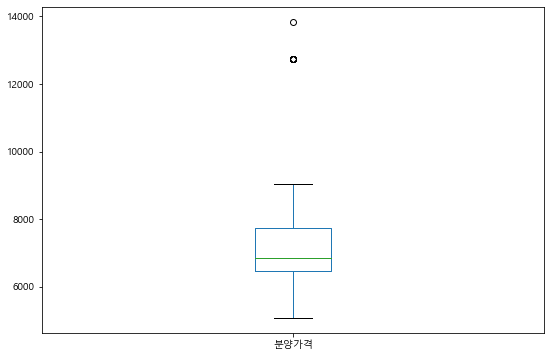

In [35]:
df_seoul = df.loc[df['지역명']=='서울']
df_seoul['분양가격'].plot(kind='box')

In [36]:
df_seoul.describe()

,연도,월,분양가격
count,265.000000,265.000000,265.000000
mean,2017.452830,6.566038,7225.762264
std,1.313768,3.601922,1303.947088
min,2015.000000,1.000000,5061.000000
25%,2016.000000,3.000000,6477.000000
50%,2017.000000,7.000000,6842.000000
75%,2019.000000,10.000000,7725.000000
max,2020.000000,12.000000,13835.000000


In [40]:
# box plot 3st quatile 1st quartile range
# 3st quatile - st quartile * 1.5
IQR = (7725-6477)*1.5
IQR

1872.0

In [42]:
# box plot max
7725+IQR

9597.0

In [43]:
# box plot min
6477-IQR

4605.0

## 5. area plot

<AxesSubplot:xlabel='월'>

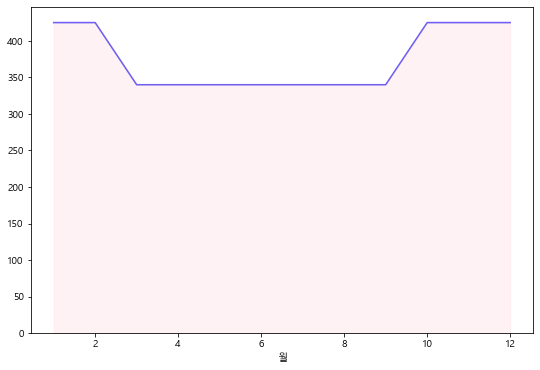

In [48]:
df.groupby('월')['분양가격'].count().plot(kind='line', color = 'blue', alpha=0.7)
df.groupby('월')['분양가격'].count().plot(kind='area', color = 'pink', alpha=0.2)

## 6. pie plot

<AxesSubplot:ylabel='분양가격'>

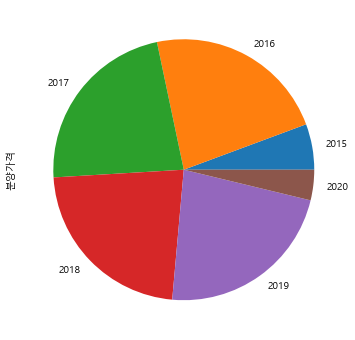

In [50]:
df.groupby('연도')['분양가격'].count().plot(kind='pie')